# Домашнее задание. Решение конкурса на kaggle.com

Это домашнее задание посвящено полноценному решению задачи машинного обучения.

# Первая часть. Исследование

In [ ]:
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt

## Загрузка данных (2 балла)

1) Посмотрите на случайные строчки.

2) Посмотрите, есть ли в датасете незаполненные значения (nan'ы) с помощью data.isna() или data.info() и, если нужно, замените их на что-то. Будет хорошо, если вы построите табличку с количеством nan в каждой колонке.

In [ ]:
!gdown 1ERwQ5odiK1Zvi1LtjpkzCMUswYsAX8_K  # train.csv
!gdown 1fGw_-RFwvn_LEdt91Jq-7A-wzG6mmH8r  # test.csv
!gdown 199Mt4OYZNaelT83U-HGDsEYs2YcUGQ6y  # submission.csv

Downloading...
From: https://drive.google.com/uc?id=1ERwQ5odiK1Zvi1LtjpkzCMUswYsAX8_K
To: /content/train.csv
100% 664k/664k [00:00<00:00, 12.5MB/s]
Downloading...
From: https://drive.google.com/uc?id=1fGw_-RFwvn_LEdt91Jq-7A-wzG6mmH8r
To: /content/test.csv
100% 218k/218k [00:00<00:00, 5.87MB/s]
Downloading...
From: https://drive.google.com/uc?id=199Mt4OYZNaelT83U-HGDsEYs2YcUGQ6y
To: /content/submission.csv
100% 14.7k/14.7k [00:00<00:00, 31.3MB/s]


In [ ]:
data = pd.read_csv('./train.csv')

In [ ]:
# Для вашего удобства списки с именами разных колонок

# Числовые признаки
num_cols = [
    'ClientPeriod',
    'MonthlySpending',
    'TotalSpent'
]

# Категориальные признаки
cat_cols = [
    'Sex',
    'IsSeniorCitizen',
    'HasPartner',
    'HasChild',
    'HasPhoneService',
    'HasMultiplePhoneNumbers',
    'HasInternetService',
    'HasOnlineSecurityService',
    'HasOnlineBackup',
    'HasDeviceProtection',
    'HasTechSupportAccess',
    'HasOnlineTV',
    'HasMovieSubscription',
    'HasContractPhone',
    'IsBillingPaperless',
    'PaymentMethod'
]

feature_cols = num_cols + cat_cols
target_col = 'Churn'

In [ ]:
data.sample(5)

,ClientPeriod,MonthlySpending,TotalSpent,Sex,IsSeniorCitizen,HasPartner,HasChild,HasPhoneService,HasMultiplePhoneNumbers,HasInternetService,HasOnlineSecurityService,HasOnlineBackup,HasDeviceProtection,HasTechSupportAccess,HasOnlineTV,HasMovieSubscription,HasContractPhone,IsBillingPaperless,PaymentMethod,Churn
1608,4,25.20,102.5,Male,1,No,No,No,No phone service,DSL,No,No,No,No,No,No,Month-to-month,Yes,Bank transfer (automatic),1
4334,10,73.55,693.3,Female,0,No,Yes,Yes,Yes,DSL,Yes,No,Yes,Yes,No,Yes,One year,No,Credit card (automatic),0
4788,53,54.45,2854.55,Male,1,No,No,No,No phone service,DSL,No,Yes,Yes,No,Yes,Yes,Month-to-month,Yes,Electronic check,1
330,19,19.90,367.55,Female,0,No,No,Yes,No,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,Month-to-month,No,Mailed check,0
2827,25,89.10,2368.4,Female,0,Yes,Yes,Yes,Yes,Fiber optic,No,No,Yes,No,No,Yes,Month-to-month,Yes,Electronic check,1


In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5282 entries, 0 to 5281
Data columns (total 20 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   ClientPeriod              5282 non-null   int64  
 1   MonthlySpending           5282 non-null   float64
 2   TotalSpent                5282 non-null   object 
 3   Sex                       5282 non-null   object 
 4   IsSeniorCitizen           5282 non-null   int64  
 5   HasPartner                5282 non-null   object 
 6   HasChild                  5282 non-null   object 
 7   HasPhoneService           5282 non-null   object 
 8   HasMultiplePhoneNumbers   5282 non-null   object 
 9   HasInternetService        5282 non-null   object 
 10  HasOnlineSecurityService  5282 non-null   object 
 11  HasOnlineBackup           5282 non-null   object 
 12  HasDeviceProtection       5282 non-null   object 
 13  HasTechSupportAccess      5282 non-null   object 
 14  HasOnlin

In [ ]:
data[data.isna().any(axis=1)]

,ClientPeriod,MonthlySpending,TotalSpent,Sex,IsSeniorCitizen,HasPartner,HasChild,HasPhoneService,HasMultiplePhoneNumbers,HasInternetService,HasOnlineSecurityService,HasOnlineBackup,HasDeviceProtection,HasTechSupportAccess,HasOnlineTV,HasMovieSubscription,HasContractPhone,IsBillingPaperless,PaymentMethod,Churn


**Обе проверки показали, что у нас чудесные данные без nan**

## Анализ данных (3 балла)

1) Для численных призанков постройте гистограмму (*plt.hist(...)*) или boxplot (*plt.boxplot(...)*). Для категориальных посчитайте количество каждого значения для каждого признака. Для каждой колонки надо сделать *data.value_counts()* и построить bar диаграммы *plt.bar(...)* или круговые диаграммы *plt.pie(...)* (хорошо, елси вы сможете это сделать на одном гарфике с помощью *plt.subplots(...)*).

2) Посмотрите на распределение целевой переменной и скажите, являются ли классы несбалансированными.

3) (Если будет желание) Поиграйте с разными библиотеками для визуализации - *sns*, *pandas_visual_analysis*, etc.

Второй пункт очень важен, потому что существуют задачи классификации с несбалансированными классами. Например, это может значить, что в датасете намного больше примеров 0 класса. В таких случаях нужно 1) не использовать accuracy как метрику 2) использовать методы борьбы с imbalanced dataset (обычно если датасет сильно несбалансирован, т.е. класса 1 в 20 раз меньше класса 0).

Пункт 1

In [ ]:
data_num=data[num_cols]
data_num.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5282 entries, 0 to 5281
Data columns (total 3 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   ClientPeriod     5282 non-null   int64  
 1   MonthlySpending  5282 non-null   float64
 2   TotalSpent       5282 non-null   object 
dtypes: float64(1), int64(1), object(1)
memory usage: 123.9+ KB


Видим, что третий столбик у нас object исправим

In [ ]:
data_num.TotalSpent.apply(float)

ValueError: could not convert string to float: ' '

In [ ]:
data_num[data_num['TotalSpent']==' ']

,ClientPeriod,MonthlySpending,TotalSpent
1048,0,25.75,
1707,0,73.35,
2543,0,19.70,
3078,0,80.85,
3697,0,20.00,
4002,0,61.90,
4326,0,25.35,
4551,0,52.55,
4598,0,56.05,


Я вижу вообще два подхода: \
Можно заменить на 0, так как у человека еще нет истории выплат\
Можно заменить на MonthlySpending, он же уже заплатил нам эти деньги\
Мне кажется, первый подход логичнее\
PS я бы вообще снес этот столбик, так как он уж слишком явно связан с двумя предыдущеми (не на 100%, там похоже есть какие-то скидки) и помешает линейным моделям, но это проблема будущего меня, да и на деревья он не так сильно влияет.

In [ ]:
data['TotalSpent']=data['TotalSpent'].replace(' ', 0)

In [ ]:
data['TotalSpent']=data['TotalSpent'].apply(float)

array([[<Axes: title={'center': 'ClientPeriod'}>,
        <Axes: title={'center': 'MonthlySpending'}>],
       [<Axes: title={'center': 'TotalSpent'}>, <Axes: >]], dtype=object)

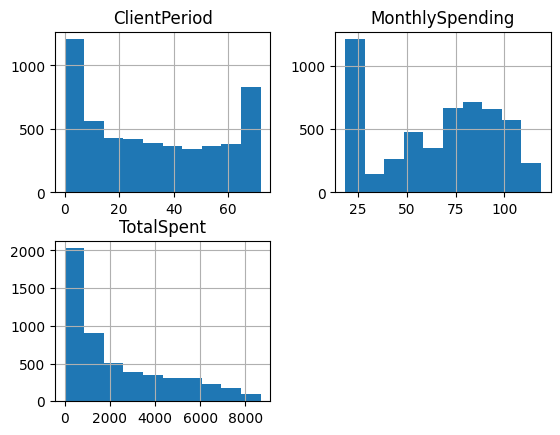

In [ ]:
data[num_cols].hist()

In [ ]:
data[cat_cols]

,Sex,IsSeniorCitizen,HasPartner,HasChild,HasPhoneService,HasMultiplePhoneNumbers,HasInternetService,HasOnlineSecurityService,HasOnlineBackup,HasDeviceProtection,HasTechSupportAccess,HasOnlineTV,HasMovieSubscription,HasContractPhone,IsBillingPaperless,PaymentMethod
0,Male,0,Yes,Yes,Yes,No,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,One year,No,Mailed check
1,Male,0,Yes,No,Yes,Yes,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,Two year,No,Credit card (automatic)
2,Male,0,No,No,Yes,No,Fiber optic,No,No,No,Yes,No,No,Month-to-month,Yes,Electronic check
3,Female,1,Yes,No,Yes,Yes,Fiber optic,No,No,Yes,No,No,No,Month-to-month,No,Mailed check
4,Female,0,Yes,Yes,Yes,Yes,Fiber optic,Yes,Yes,Yes,Yes,Yes,Yes,Two year,No,Credit card (automatic)
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5277,Male,0,No,No,No,No phone service,DSL,No,No,No,Yes,No,No,Month-to-month,No,Electronic check
5278,Male,0,Yes,No,No,No phone service,DSL,Yes,No,No,Yes,Yes,No,One year,Yes,Bank transfer (automatic)
5279,Male,0,No,No,Yes,No,DSL,No,No,Yes,Yes,No,No,Month-to-month,No,Mailed check
5280,Female,0,No,No,Yes,Yes,Fiber optic,No,No,No,No,No,No,Month-to-month,Yes,Credit card (automatic)


In [ ]:
data[cat_cols].info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5282 entries, 0 to 5281
Data columns (total 16 columns):
 #   Column                    Non-Null Count  Dtype 
---  ------                    --------------  ----- 
 0   Sex                       5282 non-null   object
 1   IsSeniorCitizen           5282 non-null   int64 
 2   HasPartner                5282 non-null   object
 3   HasChild                  5282 non-null   object
 4   HasPhoneService           5282 non-null   object
 5   HasMultiplePhoneNumbers   5282 non-null   object
 6   HasInternetService        5282 non-null   object
 7   HasOnlineSecurityService  5282 non-null   object
 8   HasOnlineBackup           5282 non-null   object
 9   HasDeviceProtection       5282 non-null   object
 10  HasTechSupportAccess      5282 non-null   object
 11  HasOnlineTV               5282 non-null   object
 12  HasMovieSubscription      5282 non-null   object
 13  HasContractPhone          5282 non-null   object
 14  IsBillingPaperless      

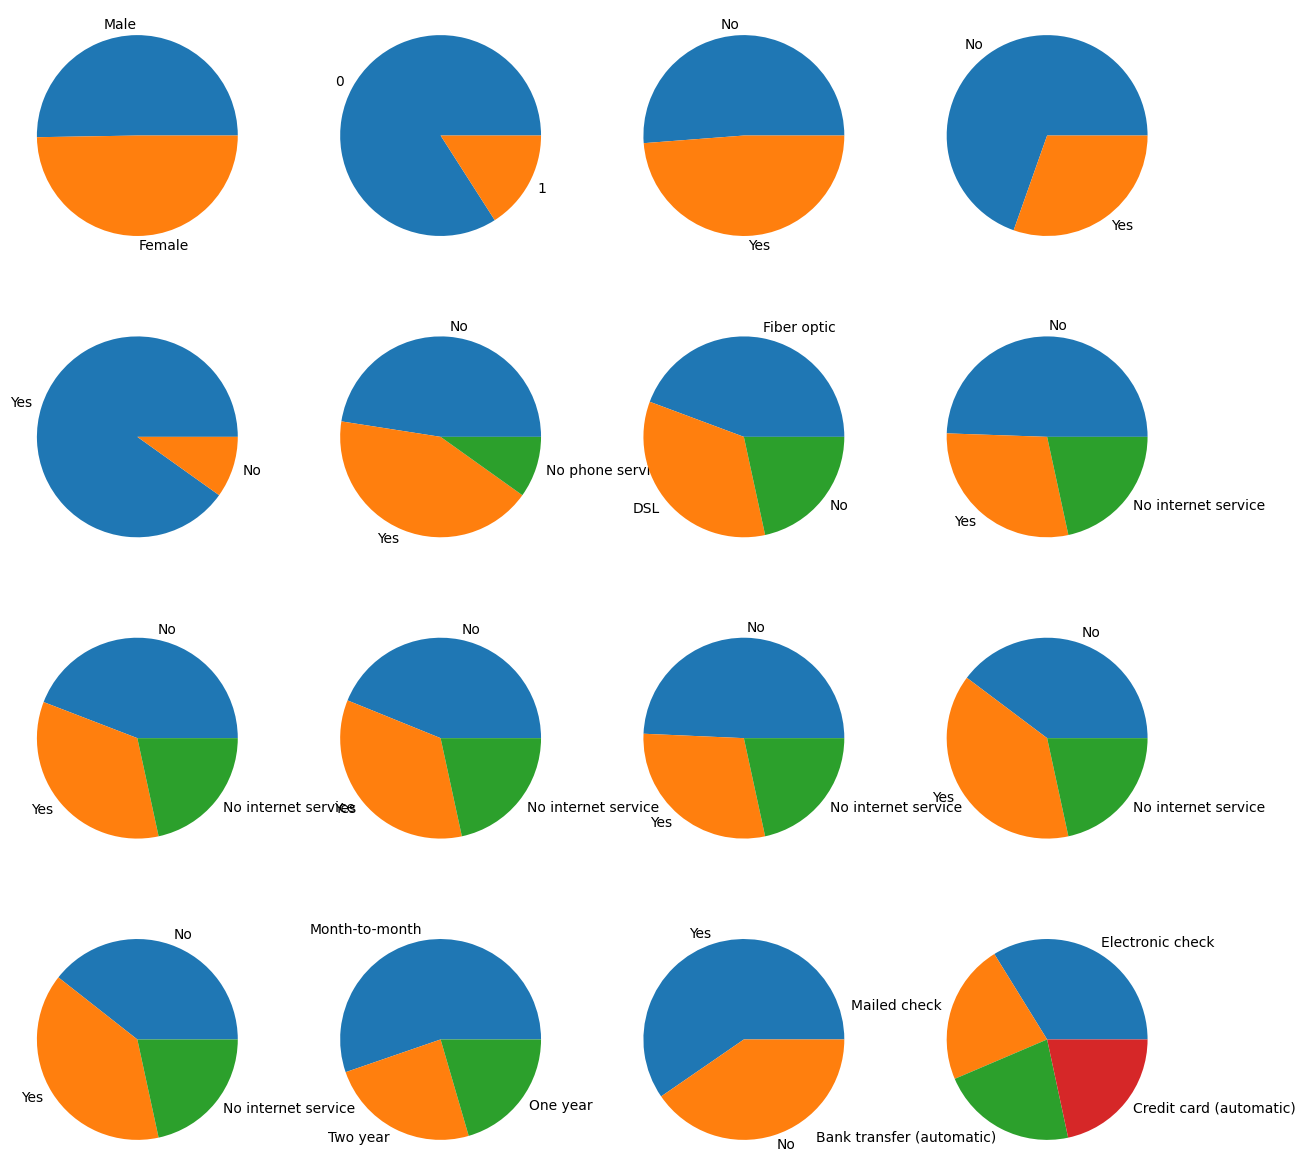

In [ ]:
fig, ax = plt.subplots(nrows=4, ncols=4, figsize=(15, 15))
cntr=-1
for i in range(4):
  for j in range(4):
    cntr+=1
    count_values=data[cat_cols[cntr]].value_counts()
    if len(count_values)<5:
      ax[i,j].pie(count_values, labels=count_values.index)
    else:
      ax[i,j].bar(count_values.index, count_values)
plt.show()

Пункт 2

In [ ]:
data.Churn.value_counts()

,count
Churn,
0,3898
1,1384


Как мы видим, люди покидают сервис в 3 раза реже уходят, чем остаются\
В целом ничего криминального, про accuracy забудем, балансировать, как мне кажется, еще рано

(Дополнительно) Если вы нашли какие-то ошибки в данных или выбросы, то можете их убрать. Тут можно поэксперементировать с обработкой данных как угодно, но не за баллы.

Давайте просто боксплоты еще глянем для числовых колонок. Так как в круговых диаграммах мы не увидели выбросов.

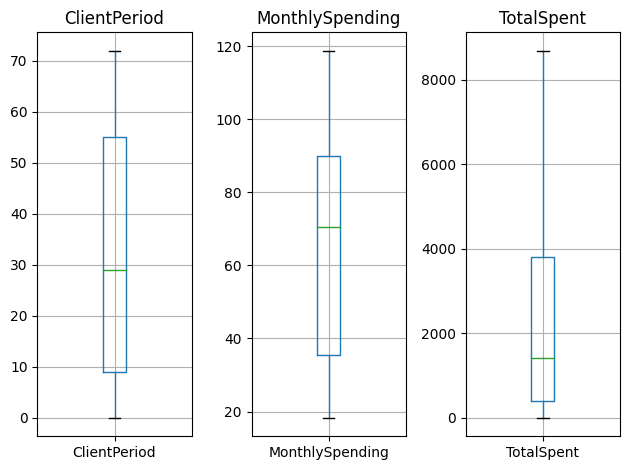

In [ ]:
for i in range(len(num_cols)):
    plt.subplot(1, len(num_cols), i + 1)
    data.boxplot(column=num_cols[i])
    plt.title(num_cols[i])
plt.tight_layout()
plt.show()

В целом точек выбросов не видно, верхушка TotalSpent, например, как раз примерна равна 70*120

## Применение линейных моделей (3 балла)

In [ ]:
from sklearn.linear_model import LogisticRegression, LogisticRegressionCV
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.preprocessing import StandardScaler, RobustScaler, LabelEncoder, OneHotEncoder
from sklearn.pipeline import make_pipeline

Оставлю оригинальную дату нетронутой

In [ ]:
data_after_prep=data.copy()

In [ ]:
data_after_prep

,ClientPeriod,MonthlySpending,TotalSpent,Sex,IsSeniorCitizen,HasPartner,HasChild,HasPhoneService,HasMultiplePhoneNumbers,HasInternetService,HasOnlineSecurityService,HasOnlineBackup,HasDeviceProtection,HasTechSupportAccess,HasOnlineTV,HasMovieSubscription,HasContractPhone,IsBillingPaperless,PaymentMethod,Churn
0,55,19.50,1026.35,Male,0,Yes,Yes,Yes,No,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,One year,No,Mailed check,0
1,72,25.85,1872.20,Male,0,Yes,No,Yes,Yes,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,Two year,No,Credit card (automatic),0
2,1,75.90,75.90,Male,0,No,No,Yes,No,Fiber optic,No,No,No,Yes,No,No,Month-to-month,Yes,Electronic check,1
3,32,79.30,2570.00,Female,1,Yes,No,Yes,Yes,Fiber optic,No,No,Yes,No,No,No,Month-to-month,No,Mailed check,0
4,60,115.25,6758.45,Female,0,Yes,Yes,Yes,Yes,Fiber optic,Yes,Yes,Yes,Yes,Yes,Yes,Two year,No,Credit card (automatic),0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5277,3,30.40,82.15,Male,0,No,No,No,No phone service,DSL,No,No,No,Yes,No,No,Month-to-month,No,Electronic check,0
5278,50,44.45,2188.45,Male,0,Yes,No,No,No phone service,DSL,Yes,No,No,Yes,Yes,No,One year,Yes,Bank transfer (automatic),0
5279,1,55.05,55.05,Male,0,No,No,Yes,No,DSL,No,No,Yes,Yes,No,No,Month-to-month,No,Mailed check,0
5280,29,76.00,2215.25,Female,0,No,No,Yes,Yes,Fiber optic,No,No,No,No,No,No,Month-to-month,Yes,Credit card (automatic),0


In [ ]:
numeric_data = data_after_prep[num_cols]
categorial_data=data_after_prep[cat_cols]

Не вижу смысла в RobustScaler, который чаще используют на данных с выбросами. Воспользуюсь классикой

In [ ]:
scaler = StandardScaler()
numeric_data_scal=scaler.fit_transform(numeric_data)
numeric_data_scal_df=pd.DataFrame(numeric_data_scal, columns=numeric_data.columns)

Теперь OneHotEncoder

Сначала чуть преобразуем колонку IsSeniorCitizen

In [ ]:
categorial_data['IsSeniorCitizen']=categorial_data['IsSeniorCitizen'].apply(lambda x: True if x == 1 else False)

<ipython-input-26-2b618329d8c1>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  categorial_data['IsSeniorCitizen']=categorial_data['IsSeniorCitizen'].apply(lambda x: True if x == 1 else False)


In [ ]:
categorial_data

,Sex,IsSeniorCitizen,HasPartner,HasChild,HasPhoneService,HasMultiplePhoneNumbers,HasInternetService,HasOnlineSecurityService,HasOnlineBackup,HasDeviceProtection,HasTechSupportAccess,HasOnlineTV,HasMovieSubscription,HasContractPhone,IsBillingPaperless,PaymentMethod
0,Male,False,Yes,Yes,Yes,No,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,One year,No,Mailed check
1,Male,False,Yes,No,Yes,Yes,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,Two year,No,Credit card (automatic)
2,Male,False,No,No,Yes,No,Fiber optic,No,No,No,Yes,No,No,Month-to-month,Yes,Electronic check
3,Female,True,Yes,No,Yes,Yes,Fiber optic,No,No,Yes,No,No,No,Month-to-month,No,Mailed check
4,Female,False,Yes,Yes,Yes,Yes,Fiber optic,Yes,Yes,Yes,Yes,Yes,Yes,Two year,No,Credit card (automatic)
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5277,Male,False,No,No,No,No phone service,DSL,No,No,No,Yes,No,No,Month-to-month,No,Electronic check
5278,Male,False,Yes,No,No,No phone service,DSL,Yes,No,No,Yes,Yes,No,One year,Yes,Bank transfer (automatic)
5279,Male,False,No,No,Yes,No,DSL,No,No,Yes,Yes,No,No,Month-to-month,No,Mailed check
5280,Female,False,No,No,Yes,Yes,Fiber optic,No,No,No,No,No,No,Month-to-month,Yes,Credit card (automatic)


In [ ]:
dummy_features = pd.get_dummies(categorial_data, drop_first=True)

In [ ]:
dummy_features

,IsSeniorCitizen,Sex_Male,HasPartner_Yes,HasChild_Yes,HasPhoneService_Yes,HasMultiplePhoneNumbers_No phone service,HasMultiplePhoneNumbers_Yes,HasInternetService_Fiber optic,HasInternetService_No,HasOnlineSecurityService_No internet service,...,HasOnlineTV_No internet service,HasOnlineTV_Yes,HasMovieSubscription_No internet service,HasMovieSubscription_Yes,HasContractPhone_One year,HasContractPhone_Two year,IsBillingPaperless_Yes,PaymentMethod_Credit card (automatic),PaymentMethod_Electronic check,PaymentMethod_Mailed check
0,False,True,True,True,True,False,False,False,True,True,...,True,False,True,False,True,False,False,False,False,True
1,False,True,True,False,True,False,True,False,True,True,...,True,False,True,False,False,True,False,True,False,False
2,False,True,False,False,True,False,False,True,False,False,...,False,False,False,False,False,False,True,False,True,False
3,True,False,True,False,True,False,True,True,False,False,...,False,False,False,False,False,False,False,False,False,True
4,False,False,True,True,True,False,True,True,False,False,...,False,True,False,True,False,True,False,True,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5277,False,True,False,False,False,True,False,False,False,False,...,False,False,False,False,False,False,False,False,True,False
5278,False,True,True,False,False,True,False,False,False,False,...,False,True,False,False,True,False,True,False,False,False
5279,False,True,False,False,True,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,True
5280,False,False,False,False,True,False,True,True,False,False,...,False,False,False,False,False,False,True,True,False,False


In [ ]:
X = pd.concat([numeric_data_scal_df, dummy_features], axis=1)
y = data.Churn

In [ ]:
X

,ClientPeriod,MonthlySpending,TotalSpent,IsSeniorCitizen,Sex_Male,HasPartner_Yes,HasChild_Yes,HasPhoneService_Yes,HasMultiplePhoneNumbers_No phone service,HasMultiplePhoneNumbers_Yes,...,HasOnlineTV_No internet service,HasOnlineTV_Yes,HasMovieSubscription_No internet service,HasMovieSubscription_Yes,HasContractPhone_One year,HasContractPhone_Two year,IsBillingPaperless_Yes,PaymentMethod_Credit card (automatic),PaymentMethod_Electronic check,PaymentMethod_Mailed check
0,0.920767,-1.505447,-0.555852,False,True,True,True,True,False,False,...,True,False,True,False,True,False,False,False,False,True
1,1.613288,-1.294998,-0.183039,False,True,True,False,True,False,True,...,True,False,True,False,False,True,False,True,False,False
2,-1.279005,0.363737,-0.974768,False,True,False,False,True,False,False,...,False,False,False,False,False,False,True,False,True,False
3,-0.016173,0.476418,0.124519,True,False,True,False,True,False,True,...,False,False,False,False,False,False,False,False,False,True
4,1.124450,1.667856,1.970599,False,False,True,True,True,False,True,...,False,True,False,True,False,True,False,True,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5277,-1.197532,-1.144204,-0.972013,False,True,False,False,False,True,False,...,False,False,False,False,False,False,False,False,True,False
5278,0.717084,-0.678565,-0.043651,False,True,True,False,False,True,False,...,False,True,False,False,True,False,True,False,False,False
5279,-1.279005,-0.327265,-0.983957,False,True,False,False,True,False,False,...,False,False,False,False,False,False,False,False,False,True
5280,-0.138382,0.367051,-0.031838,False,False,False,False,True,False,True,...,False,False,False,False,False,False,True,True,False,False


Разобьем выборку

In [ ]:
X_train, X_valid, y_train, y_valid = train_test_split(X, y, test_size=0.2, random_state=42)


model = LogisticRegressionCV(
    Cs=[100, 10, 1, 0.1, 0.01, 0.001],
    cv=5,
    scoring='roc_auc',
    refit=True
)

model.fit(X_train, y_train)

y_pred_proba = model.predict_proba(X_valid)[:, 1]
roc_auc = roc_auc_score(y_valid, y_pred_proba)
print(f"ROC-AUC на валидационной выборке: {roc_auc}")

best_C = model.C_[0]
print(f"Лучший параметр C: {best_C}")

ROC-AUC на валидационной выборке: 0.8273196590352878
Лучший параметр C: 10.0


ROC-AUC на валидационной выборке: 0.8273196590352878\
Лучший параметр C: 10.0


## Применение градиентного бустинга (2 балла)

Если вы хотите получить баллы за точный ответ, то стоит попробовать градиентный бустинг. Часто градиентный бустинг с параметрами по умолчанию даст вам 80% результата за 0% усилий.

Мы будем использовать catboost, поэтому нам не надо кодировать категориальные признаки. Catboost сделает это сам (в .fit() надо передать cat_features=cat_cols). А численные признаки нормировать для моделей, основанных на деревьях не нужно.

1) Разделите выборку на train/valid. Протестируйте catboost cо стандартными параметрами.

2) Протестируйте разные занчения параметров количества деревьев и learning_rate'а и выберите лучшую по метрике ROC-AUC комбинацию.

(Дополнительно) Есть некоторые сложности с тем, чтобы использовать CatBoostClassifier вместе с GridSearchCV, поэтому мы не просим использовать кроссвалидацию. Но можете попробовать)

Опять копирую дату

In [ ]:
data_for_boosting=data.copy()
X=data_for_boosting.iloc[:,:-1]
y=data_for_boosting.Churn

In [ ]:
from catboost import CatBoostClassifier
X_train, X_valid, y_train, y_valid = train_test_split(X, y, test_size=0.2, random_state=42)


model = CatBoostClassifier(
    iterations=1000,
    learning_rate=0.1,
    eval_metric='AUC',
    verbose=100,
    random_seed=42
)

model.fit(X_train, y_train, cat_features=cat_cols, eval_set=(X_valid, y_valid), plot=False)

y_pred_proba = model.predict_proba(X_valid)[:, 1]

roc_auc = roc_auc_score(y_valid, y_pred_proba)
print(f"ROC-AUC на валидационной выборке: {roc_auc}")

best_roc_auc = 0
best_params = {}

for lr in [0.1, 0.05, 0.01]:
    for iters in [500, 1000, 1500]:
        model = CatBoostClassifier(
            iterations=iters,
            learning_rate=lr,
            eval_metric='AUC',
            random_seed=42,
            verbose=100
        )
        model.fit(X_train, y_train, cat_features=cat_cols, eval_set=(X_valid, y_valid), plot=False)

        y_pred_proba = model.predict_proba(X_valid)[:, 1]

        roc_auc = roc_auc_score(y_valid, y_pred_proba)
        print(f"Iterations: {iters}, Learning rate: {lr}, ROC-AUC: {roc_auc}")

        if roc_auc > best_roc_auc:
            best_roc_auc = roc_auc
            best_params = {'iterations': iters, 'learning_rate': lr}

print(f"Лучшие параметры: {best_params}, Лучший ROC-AUC: {best_roc_auc}")


0:	test: 0.8011770	best: 0.8011770 (0)	total: 15.8ms	remaining: 15.8s
100:	test: 0.8259113	best: 0.8285964 (66)	total: 1.23s	remaining: 10.9s
200:	test: 0.8197191	best: 0.8285964 (66)	total: 3.37s	remaining: 13.4s
300:	test: 0.8158010	best: 0.8285964 (66)	total: 5.79s	remaining: 13.4s
400:	test: 0.8125317	best: 0.8285964 (66)	total: 7.29s	remaining: 10.9s
500:	test: 0.8108879	best: 0.8285964 (66)	total: 8.81s	remaining: 8.77s
600:	test: 0.8078818	best: 0.8285964 (66)	total: 10.3s	remaining: 6.83s
700:	test: 0.8039892	best: 0.8285964 (66)	total: 11.8s	remaining: 5.03s
800:	test: 0.8027978	best: 0.8285964 (66)	total: 13.3s	remaining: 3.3s
900:	test: 0.8020428	best: 0.8285964 (66)	total: 14.8s	remaining: 1.63s
999:	test: 0.8022460	best: 0.8285964 (66)	total: 17.2s	remaining: 0us

bestTest = 0.8285964297
bestIteration = 66

Shrink model to first 67 iterations.
ROC-AUC на валидационной выборке: 0.8285964296598664
0:	test: 0.8011770	best: 0.8011770 (0)	total: 35.1ms	remaining: 17.5s
100:	tes

Лучшие параметры: {'iterations': 500, 'learning_rate': 0.05},\
 Лучший ROC-AUC: 0.8314593511327011

# Предсказания

In [ ]:
X_test = pd.read_csv('./test.csv')
submission = pd.read_csv('./submission.csv')

best_model = CatBoostClassifier(
    iterations=best_params['iterations'],
    learning_rate=best_params['learning_rate'],
    eval_metric='AUC',
    random_seed=42,
    verbose=100
)

best_model.fit(X, y, cat_features=cat_cols)

submission['Churn'] = best_model.predict_proba(X_test)[:, 1]
submission.to_csv('./my_submission.csv')


0:	total: 58.1ms	remaining: 29s
100:	total: 3.44s	remaining: 13.6s
200:	total: 7.51s	remaining: 11.2s
300:	total: 11.6s	remaining: 7.69s
400:	total: 15.5s	remaining: 3.84s
499:	total: 19.4s	remaining: 0us


In [ ]:
submission['Churn']

,Churn
0,0.021973
1,0.713585
2,0.597889
3,0.025146
4,0.002726
...,...
1756,0.140720
1757,0.007782
1758,0.781695
1759,0.434852


Вдруг кому интересно будет:)\
ROC-AUC вашего решения равен 0.8485554083314483.